In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### 1. Data Cleansing

In [4]:
data[data.columns[data.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Cabin     204 non-null    object 
 2   Embarked  889 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


In [5]:
# Dropping rows with null values
data.drop(data[pd.isnull(data.Age)].index, axis=0, inplace=True)
data.drop(data[pd.isnull(data.Embarked)].index, axis=0, inplace=True)

#Lot of nulls in cabin, hence dropping the column
data.drop('Cabin', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [7]:
data.drop('PassengerId', axis=1, inplace=True)

### 2. Univariate Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2a. Age

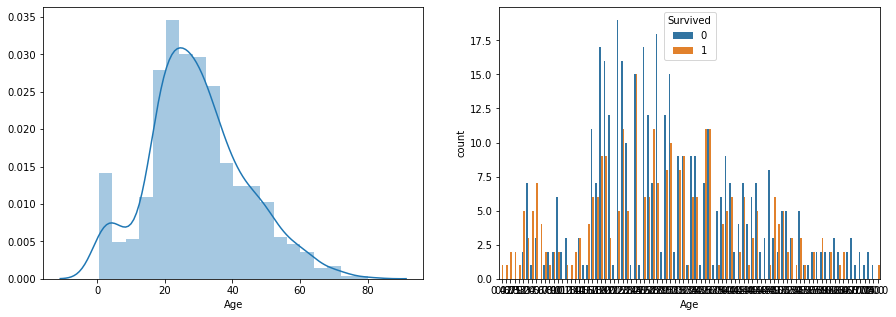

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Age'], ax=axes[0])
sns.countplot(x='Age', hue='Survived', data=data, ax=axes[1])

In [10]:
def group_by_age(age):
    if (age < 2):
         return 'Infant'
    elif (age < 12):
         return 'Child'
    elif (age < 60):
         return 'Young'
    else:
         return 'Old'
    
data['AgeGroup'] = data['Age'].apply(lambda x: group_by_age(x))

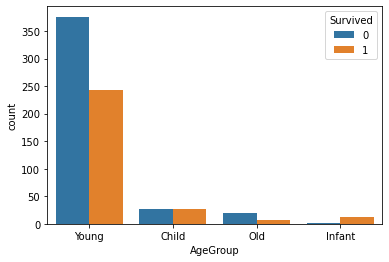

In [11]:
sns.countplot(x='AgeGroup', hue='Survived', data=data)

### 2b. Fare

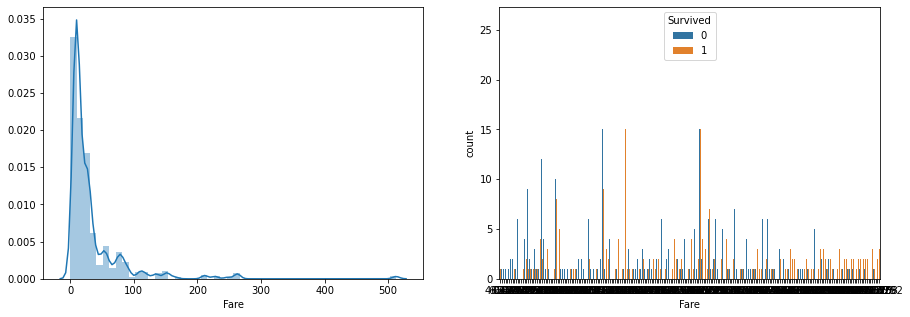

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Fare'], ax=axes[0])
sns.countplot(x='Fare', hue='Survived', data=data, ax=axes[1])

In [13]:
def group_by_fare(fare, quantiles):
    for qtl, value in quantiles.items():
        if fare < value:
            return 'Qtl_' + str(int(qtl*100))
    return 'Qtl_100'

quantiles = data['Fare'].quantile([0.1, 0.9])
data['FareGroup'] = data['Fare'].apply(lambda x: group_by_fare(x, quantiles))

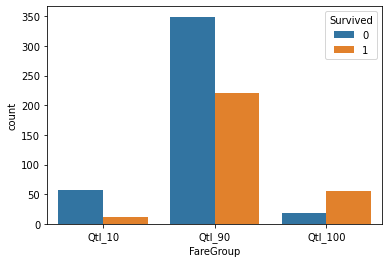

In [14]:
sns.countplot(x='FareGroup', hue='Survived', data=data)

### 2c. Pclass

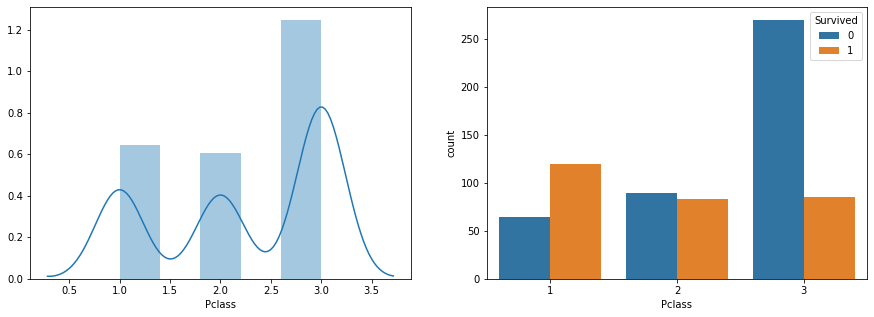

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['Pclass'], ax=axes[0])
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[1])

In [16]:
data['Pclass2'] = data['Pclass'].apply(lambda x: 'Class_' + str(x))

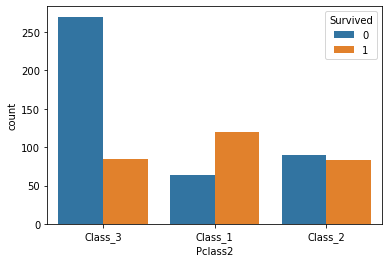

In [17]:
sns.countplot(x='Pclass2', hue='Survived', data=data)

### 2d. Sex

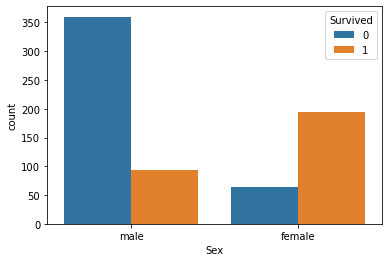

In [18]:
sns.countplot(x='Sex', hue='Survived', data=data)

### 2e. SibSp

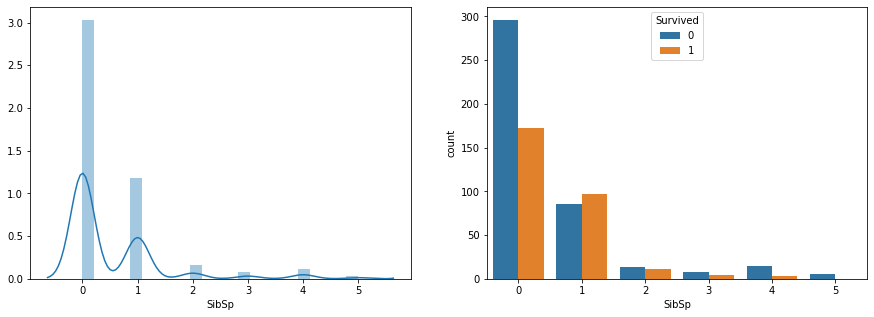

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['SibSp'], ax=axes[0])
sns.countplot(x='SibSp', hue='Survived', data=data, ax=axes[1])

### 2f. Parch (Parent Child)

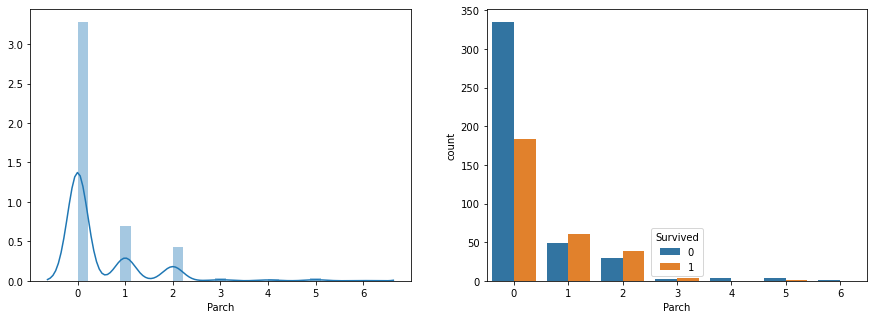

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['Parch'], ax=axes[0])
sns.countplot(x='Parch', hue='Survived', data=data, ax=axes[1])

In [21]:
def isFamilyWithChildren(row):
    if (row.Parch > 0):
        return 1
    return 0

data['isFamilyWithChildren'] = data.apply(lambda row: isFamilyWithChildren(row), axis=1)

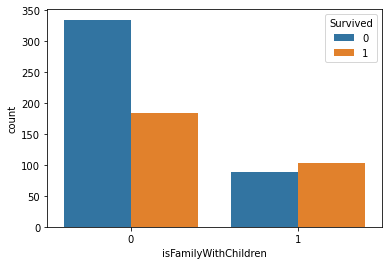

In [22]:
sns.countplot(x='isFamilyWithChildren', hue='Survived', data=data)

### 2g. Embarked

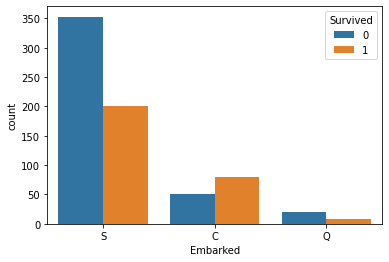

In [23]:
sns.countplot(x='Embarked', hue='Survived', data=data)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              712 non-null    int64  
 1   Pclass                712 non-null    int64  
 2   Name                  712 non-null    object 
 3   Sex                   712 non-null    object 
 4   Age                   712 non-null    float64
 5   SibSp                 712 non-null    int64  
 6   Parch                 712 non-null    int64  
 7   Ticket                712 non-null    object 
 8   Fare                  712 non-null    float64
 9   Embarked              712 non-null    object 
 10  AgeGroup              712 non-null    object 
 11  FareGroup             712 non-null    object 
 12  Pclass2               712 non-null    object 
 13  isFamilyWithChildren  712 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 103.4+ KB


In [25]:
titanic = data.filter(['Survived','Pclass2','Sex','AgeGroup','FareGroup','isFamilyWithChildren','Embarked'], axis=1)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Survived              712 non-null    int64 
 1   Pclass2               712 non-null    object
 2   Sex                   712 non-null    object
 3   AgeGroup              712 non-null    object
 4   FareGroup             712 non-null    object
 5   isFamilyWithChildren  712 non-null    int64 
 6   Embarked              712 non-null    object
dtypes: int64(2), object(5)
memory usage: 64.5+ KB


## Test Train split

In [27]:
y = titanic['Survived']
X = titanic[['Pclass2','Sex','AgeGroup','FareGroup','isFamilyWithChildren','Embarked']]
X = pd.get_dummies(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [29]:
X

,isFamilyWithChildren,Pclass2_Class_1,Pclass2_Class_2,Pclass2_Class_3,Sex_female,Sex_male,AgeGroup_Child,AgeGroup_Infant,AgeGroup_Old,AgeGroup_Young,FareGroup_Qtl_10,FareGroup_Qtl_100,FareGroup_Qtl_90,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0
2,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
886,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
887,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
889,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()

In [32]:
model = logreg.fit(X_train, y_train)

In [33]:
print(model.coef_)

[[-0.2099715   0.89298352  0.18186713 -1.07489954  1.29520979 -1.29525869
   0.20424732  1.63114072 -1.12810788 -0.70732906  0.05735997  0.03514215
  -0.09255102  0.43435406 -0.23303406 -0.20136889]]


In [34]:
y_test_pred = model.predict(X_test)

In [35]:
import numpy as np
print(np.array(y_test))

[0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [36]:
y_test_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
from sklearn import metrics

In [38]:
metrics.accuracy_score(y_test, y_test_pred)

0.7972027972027972

In [39]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[77, 15],
       [14, 37]], dtype=int64)

## Predicting the class for the actual data

In [40]:
def prepare_data(test_data):
    test_data['AgeGroup'] = test_data['Age'].apply(lambda x: group_by_age(x))
    test_data['FareGroup'] = test_data['Fare'].apply(lambda x: group_by_fare(x, quantiles))
    test_data['isFamilyWithChildren'] = test_data.apply(lambda row: isFamilyWithChildren(row), axis=1)
    test_data['Pclass2'] = test_data['Pclass'].apply(lambda x: 'Class_' + str(x))
    test_data2 = test_data[['Pclass2','Sex','AgeGroup','FareGroup','isFamilyWithChildren','Embarked']]
    return pd.get_dummies(test_data2)

In [41]:
test_data = pd.read_csv('./test.csv')
test_data2 = prepare_data(test_data)

In [42]:
test_data2

,isFamilyWithChildren,Pclass2_Class_1,Pclass2_Class_2,Pclass2_Class_3,Sex_female,Sex_male,AgeGroup_Child,AgeGroup_Infant,AgeGroup_Old,AgeGroup_Young,FareGroup_Qtl_10,FareGroup_Qtl_100,FareGroup_Qtl_90,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
414,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0
415,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
416,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


In [43]:
test_data2_pred = model.predict(test_data2)

In [47]:
test_data['Survived'] = test_data2_pred

In [50]:
test_data[['PassengerId', 'Survived']].to_csv('./result.csv', index=False)